In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def percentstr2float(df, column):
    for idx, elem in enumerate(df[column]):
        if isinstance(elem, float): 
            continue
        try:
            numeric_value = float(elem[:-1]) / 100
        except:
            numeric_value = float(elem[:-1].replace(',', '.')) / 100
        df.loc[idx, column] = numeric_value
    return df

def comma2dot(df, column):
    for idx, elem in enumerate(df[column]):
        if not isinstance(elem, str): 
            continue
        numeric_value = float(elem.replace(',', '.'))        
        df.loc[idx, column] = numeric_value
    return df

## Lagemaße

In [2]:
data_tatort = pd.read_csv('data/Tatort.csv')
data_tatort = data_tatort.sort_values(by='Anzahl Leichen')
data_tatort = data_tatort.set_index('Anzahl Leichen')

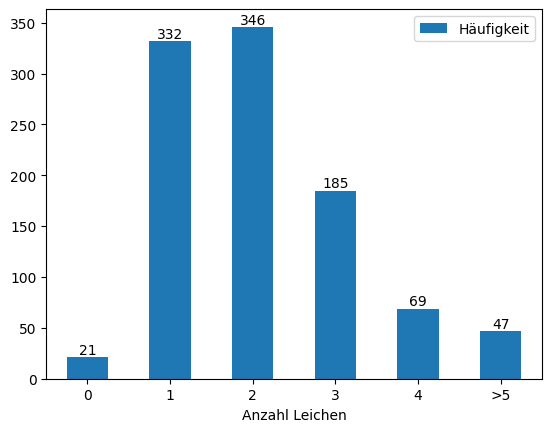

In [3]:
ax = data_tatort.plot.bar(y='Häufigkeit', rot=0)

for container in ax.containers:
    ax.bar_label(container)

In [4]:
data_tatort['Häufigkeit'].idxmax()

'2'

## Median

In [5]:
data_nowshows = pd.read_csv('data/NoShows.csv')
data_nowshows

Number of No-Shows  Absolute Frequency Relative Frequency
0                   0                  11                11%
1                   1                  38                38%
2                   2                  32                32%
3                   3                   9                 9%
4                   4                   6                 6%
5                   5                   3                 3%
6                   6                   1                 1%

In [6]:
data_nowshows = data_nowshows.set_index('Number of No-Shows')

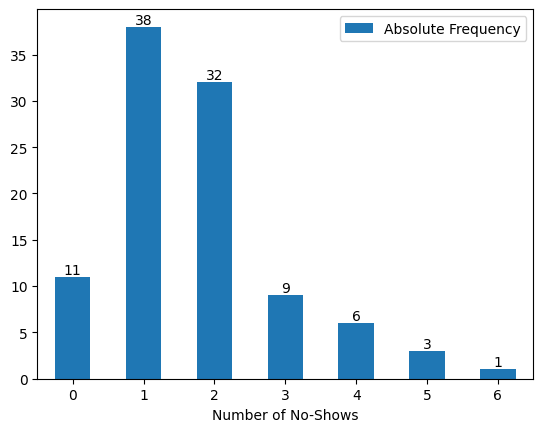

In [7]:
ax = data_nowshows.plot.bar(y='Absolute Frequency', rot=0)

for container in ax.containers:
    ax.bar_label(container)

In [8]:
# What is the median? What is the mean?

## Mittelwert

In [32]:
data_spanishwines = pd.read_csv('data/SpanishWines.csv')
data_spanishwines = comma2dot(data_spanishwines, 'Alcohol declared')
data_spanishwines = comma2dot(data_spanishwines, 'Alcohol measured')
data_spanishwines.head()

Name Alcohol declared Alcohol measured Price Rating Price category  \
0   A0             12.5             12.9  4,88      E          Cheap   
1   A1             12.5             12.8  8,55      E      Expensive   
2   A2             13.0             13.1  5,85      E          Cheap   
3   A3             13.5             14.1  8,18     VG      Expensive   
4   A4             12.5             12.7  4,19     VG          Cheap   

           Price cat  
0  Cheap (< 6 euros)  
1  Moderately priced  
2  Cheap (< 6 euros)  
3  Moderately priced  
4  Cheap (< 6 euros)

In [35]:
data_spanishwines['Alcohol declared'] = pd.to_numeric(data_spanishwines['Alcohol declared'])
data_spanishwines['Alcohol measured'] = pd.to_numeric(data_spanishwines['Alcohol measured'])

data_spanishwines.mean(numeric_only=True)

Alcohol declared    12.757143
Alcohol measured    13.004286
dtype: float64

## Streumaße

In [41]:
rng = np.random.default_rng()

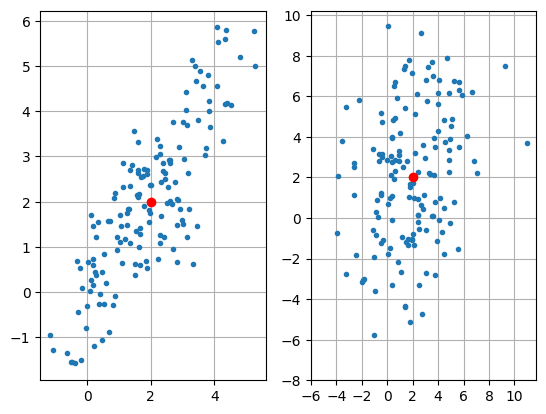

In [124]:
mean = [2, 2]

cov1 = [[2, 2], [2, 3]]
cov2 = [[7, 2], [2, 12]]

x1, y1 = rng.multivariate_normal(mean, cov1, 150).T
x2, y2 = rng.multivariate_normal(mean, cov2, 150).T

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.plot(x1, y1, '.')
ax1.plot(2, 2, 'ro')
ax1.grid(visible=True)

ax2.plot(x2, y2, '.')
ax2.plot(2, 2, 'ro')
ax2.grid(visible=True)
ax2.set_xticks(range(-6, 11, 2))
ax2.set_yticks(range(-8, 11, 2))

plt.show()

In [127]:
data_kevlar = pd.read_csv('data/Kevlar.csv')
data_kevlar = comma2dot(data_kevlar, 'Life span')
data_kevlar['Life span'] = pd.to_numeric(data_kevlar['Life span'])
data_kevlar

Life span
0       50.1
1      118.0
2      353.0
3       29.6
4       84.2
5      669.7
6      118.5
7      166.0
8      202.0
9      137.8

In [135]:
mean = data_kevlar.mean()
std = data_kevlar.std()
var = data_kevlar.var()

print("The mean is \n{}\n".format(mean))
print("The standard deviation is \n{}\n".format(std))
print("The variance is \n{}\n".format(var))

The mean is 
Life span    192.89
dtype: float64

The standard deviation is 
Life span    190.564212
dtype: float64

The variance is 
Life span    36314.718778
dtype: float64

